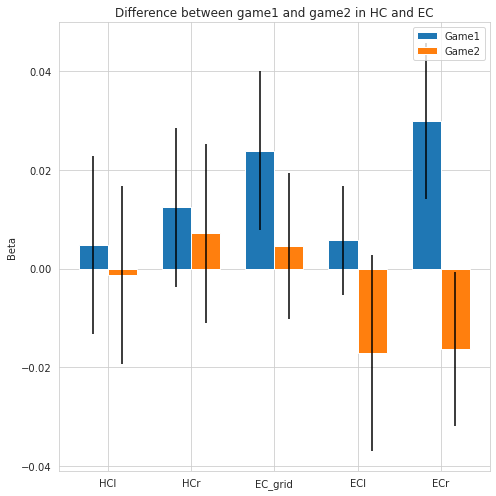

In [27]:
import numpy as np
from nilearn.masking import apply_mask
from nilearn.image import load_img,resample_to_img,math_img

# load roi
HCl = load_img(r'/mnt/workdir/DCM/docs/Reference/Park_Grid_Coding/osfstorage-archive/data/Analysis_ROI_nii/HCl_roi.nii')
HCr = load_img(r'/mnt/workdir/DCM/docs/Reference/Park_Grid_Coding/osfstorage-archive/data/Analysis_ROI_nii/HCr_roi.nii')

EC_grid = load_img(r'/mnt/workdir/DCM/docs/Reference/Park_Grid_Coding/osfstorage-archive/data/Analysis_ROI_nii/EC_Grid_roi.nii')

ECl  = load_img(r'/mnt/workdir/DCM/docs/Reference/Park_Grid_Coding/osfstorage-archive/data/Analysis_ROI_nii/ECl_roi.nii')
ECr = load_img(r'/mnt/workdir/DCM/docs/Reference/Park_Grid_Coding/osfstorage-archive/data/Analysis_ROI_nii/ECr_roi.nii')

# load stats map
game1_cmap = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/game1/separate_hexagon/Setall/group/covariates/'
                          r'age/2ndLevel/_contrast_id_ZF_0006/con_0002.nii')
game2_cmap = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/game2/separate_hexagon/Setall/group/covariates/'
                          r'age/2ndLevel/_contrast_id_ZF_0006/con_0002.nii')


# apply mask
HCl,HCr,EC_grid,ECl,ECr = [resample_to_img(mask, game1_cmap,interpolation='nearest')
                                       for mask in [HCl,HCr,EC_grid,ECl,ECr]]


contrast_map = math_img("img1-img2",img1=game1_cmap,img2=game2_cmap)
# game1
rois = ['HCl','HCr','EC_grid','ECl','ECr']
game1_means = []
game1_std = []

for roi in rois:
    betas = apply_mask(imgs=contrast_map, mask_img=eval(roi))
    betas[betas==0] = np.nan
    game1_means.append(np.nanmean(betas))
    game1_std.append(np.nanstd(betas))

#
game2_means = []
game2_std = []
for roi in rois:
    betas = apply_mask(imgs=game2_acc_cmap, mask_img=eval(roi))
    betas[betas==0] = np.nan
    game2_means.append(np.nanmean(betas))
    game2_std.append(np.nanstd(betas))


import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(7,7))

x = np.arange(len(rois))  # the label locations
width = 0.35  # the width of the bars

ax.bar(x - width/2, game1_means, width, yerr=game1_std, label='Game1')
ax.bar(x + width/2, game2_means, width, yerr=game2_std, label='Game2')

ax.set_xticks(x) # values
ax.set_xticklabels(rois) # labels
ax.set_ylabel('Beta')
ax.set_title('Difference between game1 and game2 in HC and EC')

ax.legend()


fig.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(kind=['game1']*5+['game2']*5,
    x=rois*2, y=game1_means+game2_means, hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6
)